In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
mat = loadmat('ex8data1.mat')
X = mat['X']
Xval = mat['Xval']
yval = mat['yval']

Text(0, 0.5, 'Taxa de transferencia (mb/s)')

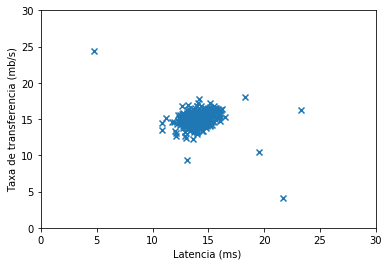

In [4]:
plt.scatter(X[:,0],X[:,1],marker='x')
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latencia (ms) ")
plt.ylabel("Taxa de transferencia (mb/s)")

In [5]:
def estimateGaussian(X):
    
    m = X.shape[0]
    
    suma = np.sum(X, axis=0)
    
    mu = (1/m) *suma
    
    var = (1/m)* np.sum((X-mu)**2,axis=0)
    
    return mu,var

In [6]:
mu, sigma2 = estimateGaussian(X)

In [10]:
def multivariateGaussian(X,mu,sigma2):
    
    k = len(mu)
    
    sigma2 = np.diag(sigma2)
    X = X-mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5)) * np.exp(-0.5*np.sum(X @ np.linalg.pinv(sigma2)*X,axis=1))
    return p

In [11]:
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    # creating a list of epsilons to select the best one
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        # true positive
        tp = np.sum(predictions[yval==1]==1)
        # false positive
        fp = np.sum(predictions[yval==0]==1)
        #false negative
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

In [13]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Melhor epsilon obtido por validação:",epsilon)
print("Melhor F1 na validação:",F1)

# mais proximo de 1, melhor

Melhor epsilon obtido por validação: 8.990852779269495e-05
Melhor F1 na validação: 0.8750000000000001


C:\Users\cataj\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  
